## Capton data: to find Chirp correction 

In [9]:
#import libraries

import numpy as np
from skimage import io
import mplcursors
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (10, 5)

In [10]:
def TA_2D_contour(data):
    
    df = pd.read_csv(data)    #Import data
    df_time = pd.Series(df.columns) #take out the column name which contains time info
    df_lambda = pd.Series(df.iloc[:,0])  #take out wavelength info from the first row
    df3 = df.set_index(df.iloc[:, 0])  #Set the first column as index
    df3 = df3.iloc[: , 1:]                  #drop the first column
    df3.index.names = ['Wavelength']   #rename index column name to wavelength
    df4 = df3.fillna(0)  #fill nan values with 0
    
    # converting string column values to float
    df4_columns = pd.Series(df4.columns)
    df4_columns_num = df4_columns.apply(pd.to_numeric, errors='coerce')
    df4.columns = df4_columns_num
    
    return df4

In [15]:
#function for plotting data

def Plotting_2D_contour(df,v):
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-v, vmax=v )
    plt.colorbar(img)
    plt.xlabel('Time(fs)')
    plt.ylabel('Wavelength(nm)')
    
    return 

In [16]:
data = "C:/Users/nita8/OneDrive - University of Toronto/Data from MPSD_CFEL/Nita/Castellano/25Mar21/Sample_marked1/Capton t0 _515 nm.txt"
# C:\Users\nita8\OneDrive - University of Toronto\Data from MPSD_CFEL\Nita\Castellano\25Mar21\Sample_marked1
# data = 'TA_matrix_31Mar_10ps_10fs.txt'
df = TA_2D_contour(data)
# df4_test = df4.iloc[1150:1810]

In [17]:
df

,902000.0,902050.0,902100.0,902150.0,902200.0,902250.0,902300.0,902350.0,902400.0,902450.0,...,914550.0,914600.0,914650.0,914700.0,914750.0,914800.0,914850.0,914900.0,914950.0,915000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
204.014651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
204.326842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
204.638937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
204.950937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
205.262842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763.495283,-348.208388,-343.950992,-371.040464,-343.977965,-364.294069,-316.370682,-326.419129,-370.572455,-383.054821,-316.604245,...,-336.597901,-420.058508,-367.236396,-372.342992,-389.658328,-309.581438,-316.373474,-332.642225,-299.6815,-352.758314
763.783026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
764.070841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


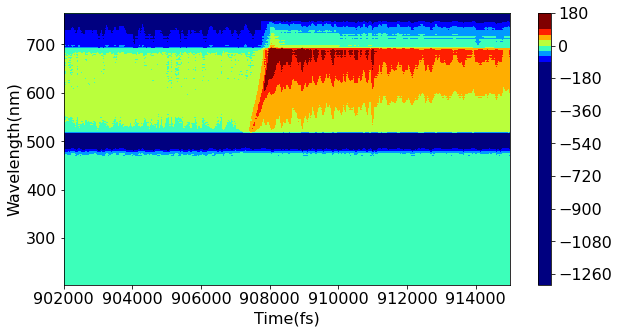

In [22]:
Plotting_2D_contour(df, 100)

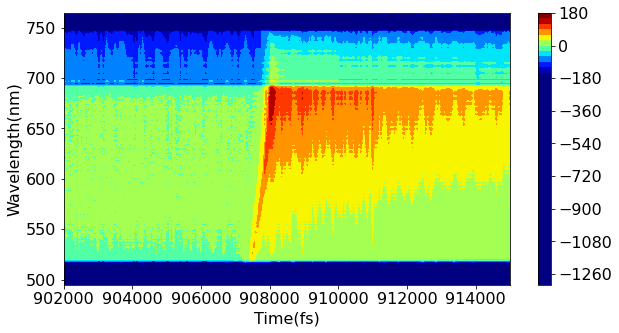

In [30]:
df_test = df.iloc[1050:2810]

Plotting_2D_contour(df_test, 150)

In [48]:
df_test.shape, df.shape

((1018, 261), (2068, 261))

In [55]:
df_try = df_test.iloc[:, 10:261]

In [56]:
df_try.shape

(1018, 251)

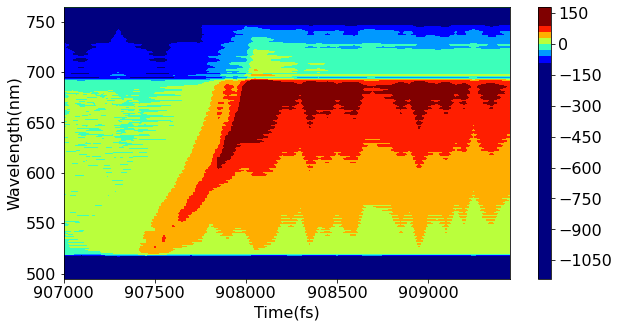

In [61]:
Plotting_2D_contour(df_test.iloc[:, 100:150], 100)

In [77]:
df_final = df_test.iloc[:, 100:150]

# choose rows & columns of a df
https://sparkbyexamples.com/pandas/pandas-select-columns-by-name-or-index/

In [69]:
# # Using iloc[] to select column by Index
# df2 = df.iloc[:,[1,3,4]] # Select columns by Index
# df2 = df.iloc[:,1:4] # Select between indexes 1 and 4 (2,3,4)
# df2 = df.iloc[:,2:] # Select From 3rd to end
# df2 = df.iloc[:,:2] # Select First Two Columns

df_final.iloc[[500], 100:150]

""
Wavelength
623.523555


In [80]:
type(list(df_final.index)[0])

float

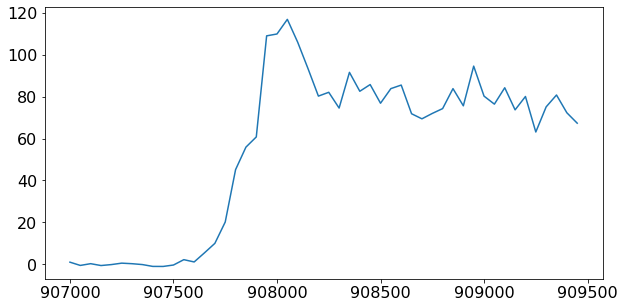

In [85]:
# df_final[[650.107996]]
plt.plot(df_final.iloc[df_final.index == 650.107996].iloc[0])